# Evaluating a mode using the **Scoring Parameter** / **cross_val_score** (Cross Validation)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split
import numpy as np
import pandas as pd
np.random.seed(42)


heart_disease = pd.read_csv("../data/heart-disease.csv")

X = heart_disease.drop("target",axis = 1)
y= heart_disease["target"]

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train , y_train)



RandomForestClassifier()

In [23]:
clf.score(X_test,y_test)

0.8524590163934426

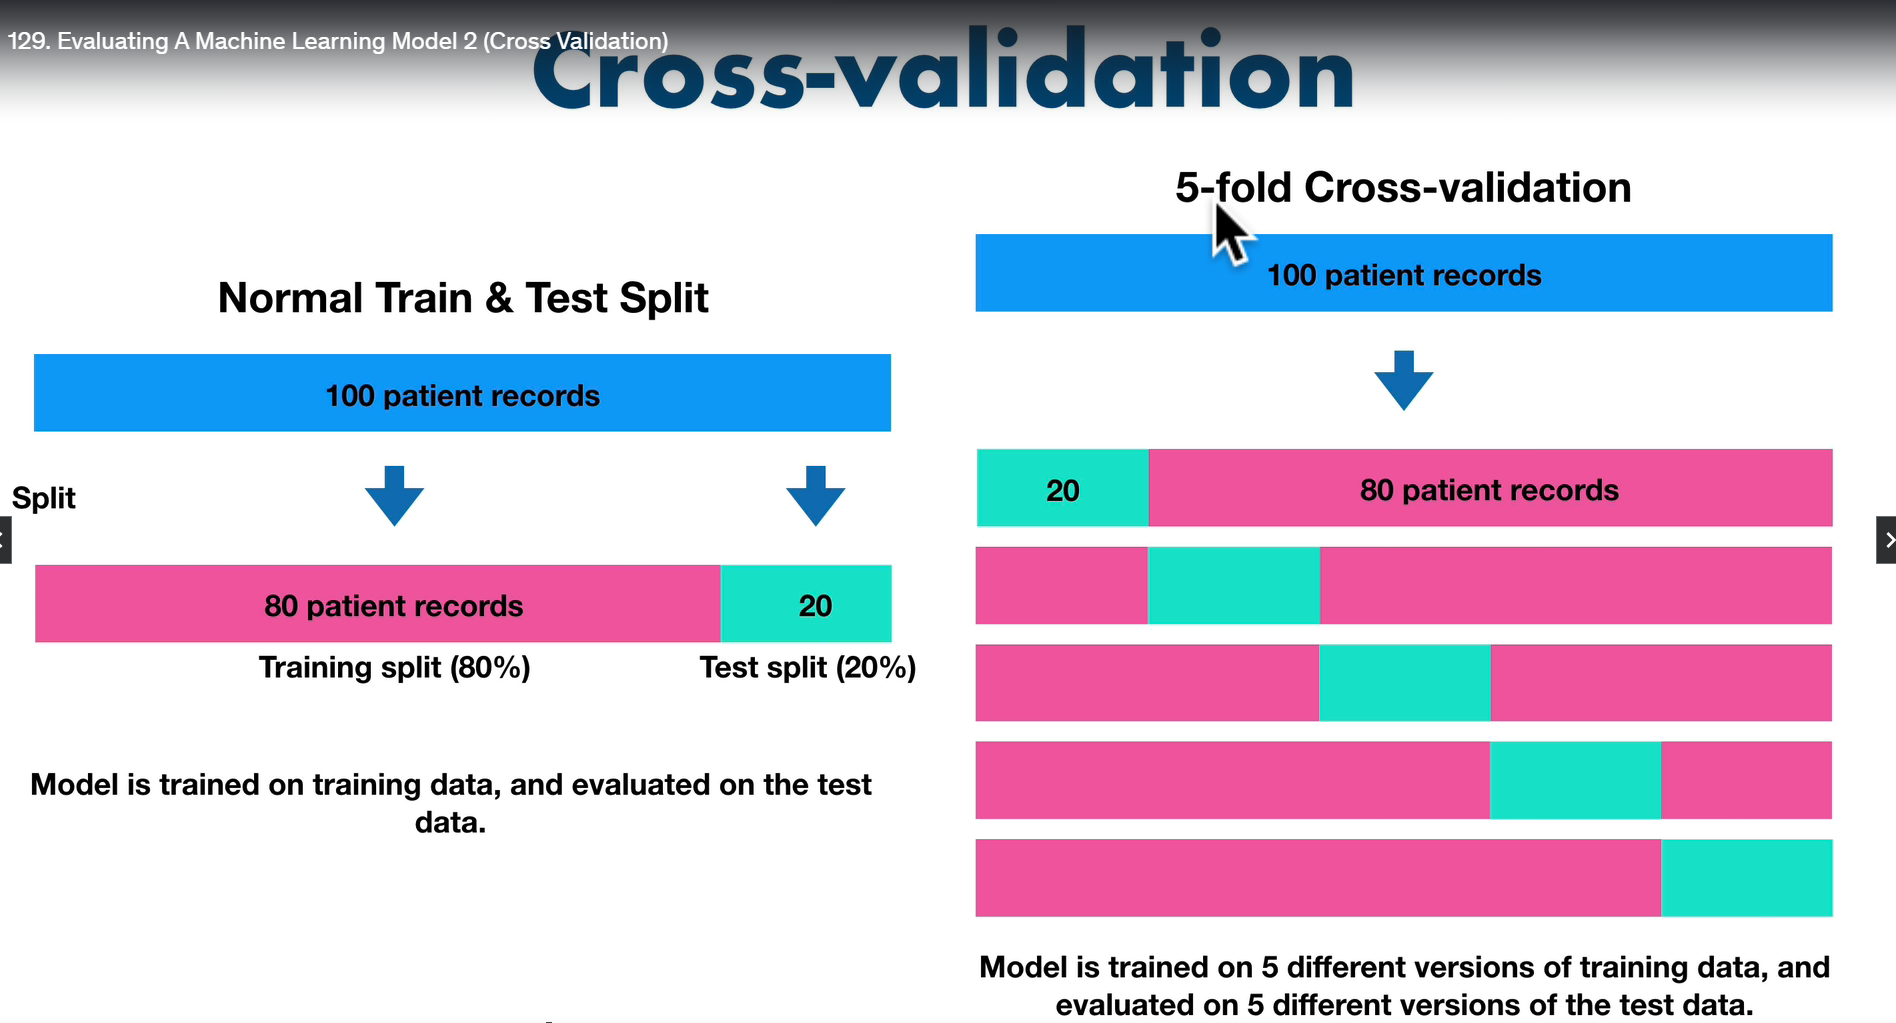

# Cross Validation basically trains model on different 20 % training data and tests on different testing data to get a more realistic and accurate model score 

In [24]:
cross_val_score(clf,X,y,cv=5) # cv value determines how many different cross validations will be done

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [25]:
cross_val_score(clf,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

# Calculating mean of Cross validation Score

In [26]:
np.random.seed(42)

# Single training and test split score
clf_single_score =  clf.score(X_test,y_test)

# Take the mean of 5-fold cross-validation score, Scoring parameter is set to None by default
clf_cross_val_score =np.mean(cross_val_score(clf,X,y,cv=5))

# Compare the two 
clf_single_score , clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

# Classification model Evaluation Metrics

1. Accuracy
2. Area under ROC Curve
3. Confusion Matrix
4. Classification report


# Accuracy


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf= RandomForestClassifier() # n_estimators param is 100 by default

cross_val_score = cross_val_score(clf,X,y,cv=5)



In [28]:
cvs_score = np.mean(cross_val_score)
cvs_score

0.8248087431693989

In [29]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {cvs_score *100:.2f} % ")

Heart Disease Classifier Cross-Validated Accuracy: 82.48 % 


# Area Under Curve / Receiver Opeating Characteristic (AUC/ROC)

- ROC curves are a comparision of a model's true positive rate **(tpr)** versus the model's false positive rate **(fpr)**

truth refers to actual answer / value

- **True positive** = model predicts **1** when truth is **1**
- **False positive** = model predicts **1** when truth is **0**
- **True negative** = model predicts **0** when truth is **0**
- **False negative** = model predicts **0** when truth is **1**


In [30]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)


In [31]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train,y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# first column is prediction of 0, second column is the prediction of 1
y_probs[:10],len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [32]:
# Extracting y positive predictions

y_probs_positive = y_probs[:,1]

y_probs_positive


array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [33]:
# Calculate fpr,tpr and tresholds
fpr,tpr,tresholds = roc_curve(y_test,y_probs_positive)

fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

In [34]:
tpr

array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
       0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
       0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
       0.9375 , 0.96875, 0.96875, 1.     , 1.     ])

In [35]:
tresholds

array([ inf, 1.  , 0.98, 0.95, 0.92, 0.88, 0.87, 0.86, 0.85, 0.83, 0.81,
       0.8 , 0.77, 0.76, 0.71, 0.66, 0.6 , 0.57, 0.49, 0.4 , 0.38, 0.31,
       0.28, 0.23, 0.2 , 0.  ])